# **PRABOWO SUBIANTO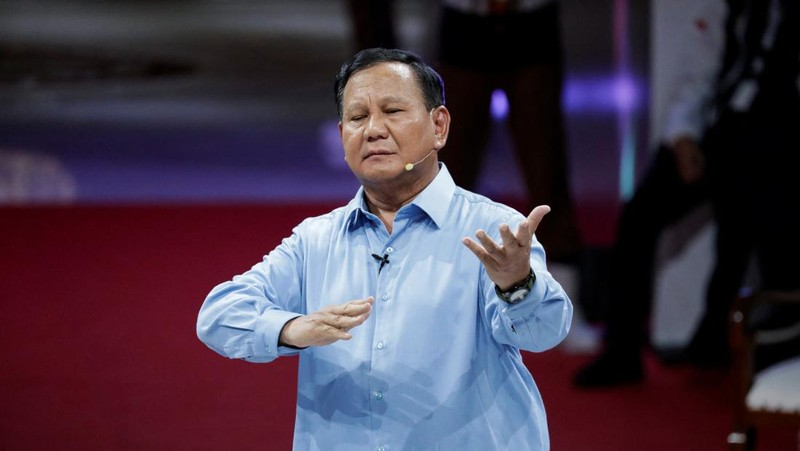**

Proyek ini bertujuan untuk melakukan analisis sentimen terhadap debat Calon Presiden Indonesia 2024, fokus pada Prabowo Subianto, melalui persepsi masyarakat yang tercermin dalam platform Twitter. Data untuk analisis diperoleh melalui proses crawling pada Twitter, dengan rentang tanggal 12 Desember 2023 hingga 22 Desember 2023.

Metode yang digunakan dalam proyek ini mencakup pengumpulan data melalui crawling, pengolahan teks untuk mengekstrak informasi relevan, dan analisis sentimen untuk menilai respons masyarakat terhadap kinerja dan pandangan Ganjar Pranowo dalam debat. Tujuan utama dari analisis sentimen ini adalah untuk memahami sejauh mana tanggapan positif, negatif, atau netral dari masyarakat terhadap berbagai aspek debat yang melibatkan Calon Presiden tersebut.


## ***IMPORT LIBRARY***

Proyek ini merupakan implementasi analisis data menggunakan Python, dengan pemanfaatan beberapa pustaka kunci seperti Pandas, re, Seaborn, dan Matplotlib.

*   Pandas
*   re
*   Seaborn
*   Matplotlib

Dengan memanfaatkan Pandas, proyek ini memungkinkan pengguna untuk melakukan manipulasi data yang efisien, termasuk pemfilteran dan pengelompokan data. Selain itu, modul re digunakan untuk melakukan operasi pencarian dan pemfilteran berbasis pola pada data.

Seaborn dan Matplotlib digunakan untuk merancang visualisasi data yang menarik dan informatif. Seaborn memberikan antarmuka yang mudah digunakan untuk menghasilkan plot statistik yang elegan, sementara Matplotlib memberikan fleksibilitas lebih lanjut dalam desain dan penyesuaian grafik

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

## ***Mounting Google Drive***

Mounting Google Drive menghubungkan Google Colab dengan Google Drive pengguna, sehingga memungkinkan akses mudah ke berkas dan dataset yang tersimpan di Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Membaca Dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/prabowo.csv')  #Membaca Dataset yang sudah di upload dalam Google Drive
df.head() #Menampilkan 5 baris pertama

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:10:46 +0000 2023,1735512698522382615,"@andre_rosiade eh botak, bilang ke capres lu d...",0,0,0,0,in,1718575798792355840,1735204525517177333,Yhafidzun15,https://twitter.com/Yhafidzun15/status/1735512...
1,1,Fri Dec 15 04:10:46 +0000 2023,1735512698086166538,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",0,0,0,0,in,1101762919,1735512698086166538,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126980...
2,2,Fri Dec 15 04:10:43 +0000 2023,1735512687281573985,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",0,0,0,0,in,1101762919,1735512687281573985,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126872...
3,3,Fri Dec 15 04:10:41 +0000 2023,1735512676552597739,@kurawa jokowi hebat....setuju tapi melihat pe...,0,0,0,0,in,1069905602,1735205387757146512,romobing,https://twitter.com/romobing/status/1735512676...
4,4,Fri Dec 15 04:10:38 +0000 2023,1735512663923490883,Prabowo prediksi AHY akan jadi pemimpin di tin...,0,0,0,0,in,1101762919,1735512663923490883,Iza_Zot,https://twitter.com/Iza_Zot/status/17355126639...


In [4]:
df = df[['full_text','username','created_at']] #mengambil 3 atribut/kolom
df #Menyimpan kembali dalam DataFrame

,full_text,username,created_at
0,"@andre_rosiade eh botak, bilang ke capres lu d...",Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023
1,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",Iza_Zot,Fri Dec 15 04:10:46 +0000 2023
2,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",Iza_Zot,Fri Dec 15 04:10:43 +0000 2023
3,@kurawa jokowi hebat....setuju tapi melihat pe...,romobing,Fri Dec 15 04:10:41 +0000 2023
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023
...,...,...,...
246,@Eko68815124 @Mdy_Asmara1701 @prabowo Prestasi...,RXKing1977,Fri Dec 15 04:03:39 +0000 2023
247,@Heraloebss @Gerindra @prabowo Hipokrit itu ka...,OrangAwak17,Fri Dec 15 04:03:39 +0000 2023
248,AHY instruksikan kader Demokrat rapatkan baris...,APhontiP,Fri Dec 15 04:03:38 +0000 2023
249,@PartaiSocmed @prabowo UHUKKKKKKK. Dikasih dui...,kumis_miow,Fri Dec 15 04:03:36 +0000 2023


## ***Cleaning Data***

In [5]:
df.shape #Menampilkan Dimensi Data Frame

(251, 3)

### *Menghapus Nilai Duplkat*

In [6]:
df = df.drop_duplicates(subset=['full_text']) #Menghapus nilai duplikat dalam kolom 'full_text'

In [7]:
df.duplicated().sum() #menghitung nilai duplikat

0

### *Menghapus Nilai NaN/Hilang*

In [8]:
df = df.dropna() #Menghapus nilai NaN/hilang

In [9]:
df.isnull().sum() #Menghitung nilai Nan/hilang

full_text     0
username      0
created_at    0
dtype: int64

In [10]:
df.shape #dimensi data setelah melakukan Cleaning Data

(251, 3)

### *Clean Twitter Text*

In [11]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)  #Menghapus semua mention (username) dari teks tweet.
  text = re.sub(r'#\w+', '', text) #Menghapus semua hashtag dari teks tweet.
  text = re.sub(r'RT[\s]+', '', text) #Menghapus istilah "RT" yang menandakan retweet.
  text = re.sub(r'https?://\S+', '', text) #Menghapus URL dari teks tweet.

  text = re.sub(r'[^A-Za-z0-9 ]', '', text) #Menyaring hanya karakter alfanumerik dari teks tweet.
  text = re.sub(r'\s+', ' ', text).strip() #Menghapus spasi yang berlebihan dan memastikan tidak ada spasi di awal atau akhir teks
  return text

df['clean_twitter_text'] = df['full_text'].apply(clean_twitter_text)
df.head()

,full_text,username,created_at,clean_twitter_text
0,"@andre_rosiade eh botak, bilang ke capres lu d...",Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023,eh botak bilang ke capres lu dulu dia ngobrol ...
1,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",Iza_Zot,Fri Dec 15 04:10:46 +0000 2023,Elektabilitas tembus 45 persen AHY Prabowo bis...
2,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",Iza_Zot,Fri Dec 15 04:10:43 +0000 2023,Beri pujian ke AHY Prabowo Pemimpin yang hebat...
3,@kurawa jokowi hebat....setuju tapi melihat pe...,romobing,Fri Dec 15 04:10:41 +0000 2023,jokowi hebatsetuju tapi melihat penampilan pra...
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023,Prabowo prediksi AHY akan jadi pemimpin di tin...


### *Mengubah Lowwercase / huruf kecil*

In [12]:
def lowercase(text):
  text = text.lower()
  return text

df['lowercase'] = df['clean_twitter_text'].apply(lowercase)
df.head()


,full_text,username,created_at,clean_twitter_text,lowercase
0,"@andre_rosiade eh botak, bilang ke capres lu d...",Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023,eh botak bilang ke capres lu dulu dia ngobrol ...,eh botak bilang ke capres lu dulu dia ngobrol ...
1,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",Iza_Zot,Fri Dec 15 04:10:46 +0000 2023,Elektabilitas tembus 45 persen AHY Prabowo bis...,elektabilitas tembus 45 persen ahy prabowo bis...
2,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",Iza_Zot,Fri Dec 15 04:10:43 +0000 2023,Beri pujian ke AHY Prabowo Pemimpin yang hebat...,beri pujian ke ahy prabowo pemimpin yang hebat...
3,@kurawa jokowi hebat....setuju tapi melihat pe...,romobing,Fri Dec 15 04:10:41 +0000 2023,jokowi hebatsetuju tapi melihat penampilan pra...,jokowi hebatsetuju tapi melihat penampilan pra...
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023,Prabowo prediksi AHY akan jadi pemimpin di tin...,prabowo prediksi ahy akan jadi pemimpin di tin...


## **Preprocessing**

### *Normalisasi*

Normalisasi adalah proses membuat data atau teks menjadi lebih seragam atau standar. Pada konteks pemrosesan teks seperti yang terlihat pada coding di atas, normalisasi dilakukan untuk menggantikan kata-kata atau frasa-frasa tertentu dengan bentuk standar atau lebih umum. Ini membantu dalam menghilangkan variasi yang tidak perlu dalam teks.

In [13]:
normalization_dict = {
    " anies ": " ",
    " prabowo ": " ",
    " yg ": " yang ",
    "kmrn": "kemarin",
    "sngt": "sangat",
    "tuch": "itu",
    " lu ": " kamu ",
    " gamau ": " tidak mau ",
    " nyalonin ": " mencalonkan ",
    " karenaaa ": " karena ",
    " udh ": " sudah ",
    " ama ": " dengan ",
    " gw ": " saya ",
    " bareng ": " bersama ",
    " gmn ": " bagaimana ",
    " ga ": " tidak ",
    " yaa ": " ya ",
    " yg ": " yang ",
    " jg ": " juga ",
    " udah ": " sudah ",
    " gt ": " begitu ",
}

def normalisasi(str_text):
  for i in normalization_dict:
    str_text = str_text.replace(i, normalization_dict[i])
  return str_text

df['normalisasi'] = df['lowercase'].apply(lambda x: normalisasi(x))
df.head()

,full_text,username,created_at,clean_twitter_text,lowercase,normalisasi
0,"@andre_rosiade eh botak, bilang ke capres lu d...",Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023,eh botak bilang ke capres lu dulu dia ngobrol ...,eh botak bilang ke capres lu dulu dia ngobrol ...,eh botak bilang ke capres kamu dulu dia ngobro...
1,"Elektabilitas tembus 45 persen, AHY: Prabowo b...",Iza_Zot,Fri Dec 15 04:10:46 +0000 2023,Elektabilitas tembus 45 persen AHY Prabowo bis...,elektabilitas tembus 45 persen ahy prabowo bis...,elektabilitas tembus 45 persen ahy bisa menang...
2,"Beri pujian ke AHY, Prabowo: Pemimpin yang heb...",Iza_Zot,Fri Dec 15 04:10:43 +0000 2023,Beri pujian ke AHY Prabowo Pemimpin yang hebat...,beri pujian ke ahy prabowo pemimpin yang hebat...,beri pujian ke ahy pemimpin yang hebat untuk b...
3,@kurawa jokowi hebat....setuju tapi melihat pe...,romobing,Fri Dec 15 04:10:41 +0000 2023,jokowi hebatsetuju tapi melihat penampilan pra...,jokowi hebatsetuju tapi melihat penampilan pra...,jokowi hebatsetuju tapi melihat penampilan di ...
4,Prabowo prediksi AHY akan jadi pemimpin di tin...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023,Prabowo prediksi AHY akan jadi pemimpin di tin...,prabowo prediksi ahy akan jadi pemimpin di tin...,prabowo prediksi ahy akan jadi pemimpin di tin...


Jadi, secara keseluruhan, fungsi normalisasi dan kamus normalization_dict digunakan untuk menggantikan kata-kata atau frasa-frasa tertentu dengan bentuk yang telah ditentukan, sehingga membuat teks menjadi lebih seragam dan lebih mudah diolah.

### Install Sastrawi


Sastrawi adalah sebuah library untuk pemrosesan bahasa alami (Natural Language Processing atau NLP) dalam bahasa Indonesia. Fungsinya adalah untuk membantu dalam melakukan beberapa tugas pemrosesan teks, seperti menghilangkan kata-kata umum (stop words) dan stemming (mengembalikan kata ke bentuk dasarnya).

In [14]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


### *StopWords*

In [15]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Mendapatkan daftar stop words dari Sastrawi
existing_stop_words = StopWordRemoverFactory().get_stop_words()

# Menambahkan stop words tambahan sesuai dengan kebutuhan
additional_stop_words = [
    'anda', 'bisa', 'dalam', 'dan', 'dapat',
    'dengan', 'di', 'jadi', 'ke', 'masih',
    'menjadi', 'nya', 'oleh', 'pada', 'saja',
    'sebagai', 'sebuah', 'semua', 'seperti',
    'serta', 'sukses', 'telah', 'terhadap',
    'terima', 'tersebut', 'untuk', 'yang',
    'ada', 'adalah', 'akan', 'sehingga',
    'sampai', 'tetapi', 'sejak', 'keluarga']


# Menggabungkan daftar stop words dari Sastrawi dengan stop words tambahan
combined_stop_words = existing_stop_words + additional_stop_words

# Membuat objek ArrayDictionary dari daftar stop words yang sudah diperbarui
new_array = ArrayDictionary(combined_stop_words)

# Membuat objek StopWordRemover dengan menggunakan ArrayDictionary yang baru
stop_word_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    # Menghapus stop words dari teks
    str_text = stop_word_remover_new.remove(str_text)
    return str_text

# Menerapkan fungsi stopword pada kolom 'normalisasi' DataFrame
df['full_text'] = df['normalisasi'].apply(lambda x: stopword(x))

# Menampilkan lima baris pertama dari DataFrame yang sudah diupdate
df.head()


,full_text,username,created_at,clean_twitter_text,lowercase,normalisasi
0,eh botak bilang capres kamu dulu ngobrol bahas...,Yhafidzun15,Fri Dec 15 04:10:46 +0000 2023,eh botak bilang ke capres lu dulu dia ngobrol ...,eh botak bilang ke capres lu dulu dia ngobrol ...,eh botak bilang ke capres kamu dulu dia ngobro...
1,elektabilitas tembus 45 persen ahy menang satu...,Iza_Zot,Fri Dec 15 04:10:46 +0000 2023,Elektabilitas tembus 45 persen AHY Prabowo bis...,elektabilitas tembus 45 persen ahy prabowo bis...,elektabilitas tembus 45 persen ahy bisa menang...
2,beri pujian ahy pemimpin hebat bangsa indonesi...,Iza_Zot,Fri Dec 15 04:10:43 +0000 2023,Beri pujian ke AHY Prabowo Pemimpin yang hebat...,beri pujian ke ahy prabowo pemimpin yang hebat...,beri pujian ke ahy pemimpin yang hebat untuk b...
3,jokowi hebatsetuju melihat penampilan debat 1 ...,romobing,Fri Dec 15 04:10:41 +0000 2023,jokowi hebatsetuju tapi melihat penampilan pra...,jokowi hebatsetuju tapi melihat penampilan pra...,jokowi hebatsetuju tapi melihat penampilan di ...
4,prabowo prediksi ahy jadi pemimpin tingkat nas...,Iza_Zot,Fri Dec 15 04:10:38 +0000 2023,Prabowo prediksi AHY akan jadi pemimpin di tin...,prabowo prediksi ahy akan jadi pemimpin di tin...,prabowo prediksi ahy akan jadi pemimpin di tin...


### *Tokenize*

Tokenization adalah proses memecah teks menjadi bagian-bagian yang lebih kecil yang disebut token. Token dapat berupa kata, frasa, atau bagian-bagian lain dari teks yang memiliki makna. Proses tokenization adalah langkah awal dalam pemrosesan teks, dan setiap unit kecil yang dihasilkan oleh tokenization disebut sebagai token.

In [16]:
## Tokenization: Memecah teks menjadi token
tokenized = df['full_text'].apply(lambda x: x.split())
tokenized

0      [eh, botak, bilang, capres, kamu, dulu, ngobro...
1      [elektabilitas, tembus, 45, persen, ahy, menan...
2      [beri, pujian, ahy, pemimpin, hebat, bangsa, i...
3      [jokowi, hebatsetuju, melihat, penampilan, deb...
4      [prabowo, prediksi, ahy, jadi, pemimpin, tingk...
                             ...                        
246    [prestasi, wowo, gebrak, meja, joged, melet2, ...
247    [hipokrit, kalah, dipilpres, malah, menteri, g...
248    [ahy, instruksikan, kader, demokrat, rapatkan,...
249      [uhukkkkkkk, dikasih, duit, berapa, info, dong]
250    [gaya, kampanye, joget, gemoy, capres, nomor, ...
Name: full_text, Length: 251, dtype: object

Contoh hasil output yang Anda berikan menunjukkan bahwa setiap baris di DataFrame tersebut sekarang berisi daftar token yang terpisah untuk setiap kata dalam teks. Misalnya, baris pertama menunjukkan daftar token untuk teks pertama, baris kedua untuk teks kedua, dan seterusnya. Setiap kata dalam teks dipecah menjadi satu elemen dalam daftar token.

### *Steming*


Stemming adalah proses dalam pemrosesan bahasa alami yang bertujuan untuk mengembalikan kata-kata ke bentuk dasarnya atau kata dasar. Tujuan utama dari stemming adalah untuk mengurangi kata-kata ke akar kata atau bentuk dasarnya sehingga kata-kata yang memiliki akar kata yang sama akan diperlakukan seragam.

In [17]:
# Import library Sastrawi dan modul StemmerFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk proses stemming pada teks
def stemming(text_cleaning):
  # Membuat objek StemmerFactory
  factory = StemmerFactory()
  # Membuat objek stemmer menggunakan StemmerFactory
  stemmer = factory.create_stemmer()

  # Inisialisasi list untuk menampung hasil stemming
  do = []

  # Looping untuk melakukan stemming pada setiap token
  for w in text_cleaning:
    # Melakukan stemming pada kata dan menambahkannya ke list 'do'
    dt = stemmer.stem(w)
    do.append(dt)

  # Menggabungkan hasil stemming menjadi satu string
  d_clean = " ".join(do)

  # Menampilkan hasil stemming
  print(d_clean)

  # Mengembalikan teks yang telah di-stemming
  return d_clean

# Mengaplikasikan fungsi stemming pada setiap baris teks dalam DataFrame 'tokenized'
tokenized = tokenized.apply(stemming)


eh botak bilang capres kamu dulu ngobrol bahas komitmen untuk nuntasin dibjakarta lama ngejabat tidak mau calon bentuk apa pilpres 2019 sudah komitmen pak mau fokus jakartaaa dulu gubernur gemes gw
elektabilitas tembus 45 persen ahy menang satu putar mua agusyudhoyono pdemokrat demokrat sama ahy
beri puji ahy pimpin hebat bangsa indonesia muj pdemokrat agusyudhoyono demokrat sama ahy
jokowi hebatsetuju lihat tampil debat 1 beliau salah pilih orang
prabowo prediksi ahy jadi pimpin tingkat nasional fc agusyudhoyono pdemokrat demokrat sama ahy
acara hari seru banget sby djoko suyanto sutanto alumni akabri 19701973 hadir dekade08
warga indonesia butuh sosok pimpin seperti mas gibran ada
demokrat sumsel siap menang pasang prabowogibran pilpres 2024 vh pdemokrat agusyudhoyono demokrat sama ahy
emang parah jijik sih bunuh karakter leceh personal saat debat kemaren pak gp aja mo nanya masalah ham pakai kata halus minta maaf dulu seblmnya makanya gak serang balik gp
ketua tim komunikasi tkn pra

Proses stemming membantu mengurangi variasi kata ke dalam bentuk dasarnya, sehingga mempermudah analisis teks dan memastikan kata-kata yang memiliki akar kata yang sama diperlakukan seragam.

In [18]:
# Menyimpan DataFrame 'tokenized' ke dalam file CSV
tokenized.to_csv("/content/drive/MyDrive/DATASET/hasilprabowo.csv", index=False)

# Membaca data dari file CSV yang disimpan sebelumnya
data = pd.read_csv("/content/drive/MyDrive/DATASET/hasilprabowo.csv", encoding='latin1')


Setelah eksekusi kode ini, data yang telah diolah dan di-stemming dalam DataFrame tokenized akan tersimpan sebagai file CSV dengan nama "hasilganjar.csv" dan dapat diakses kembali menggunakan DataFrame data

### *Translate*

In [19]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=b4733e5e70c57d5baf9ea36de7c365d48c8fbb7bac03d756140878e2e610e56a
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [20]:
import pandas as pd
from googletrans import Translator
data = pd.read_csv("/content/drive/MyDrive/DATASET/hasilprabowo.csv", encoding='latin1')
data.head()

,full_text
0,eh botak bilang capres kamu dulu ngobrol bahas...
1,elektabilitas tembus 45 persen ahy menang satu...
2,beri puji ahy pimpin hebat bangsa indonesia mu...
3,jokowi hebatsetuju lihat tampil debat 1 beliau...
4,prabowo prediksi ahy jadi pimpin tingkat nasio...


In [21]:
import pandas as pd
from googletrans import Translator

# Fungsi untuk terjemahan
def convert_eng(tweet):
    try:
        translator = Translator()
        translation = translator.translate(tweet, src='id', dest='en')
        return translation.text
    except Exception as e:
        print(f"Error translating: {e}")
        return None

# Menerapkan fungsi terjemahan pada kolom 'full_text'
data["tweet_english"] = data['full_text'].apply(convert_eng)

# Menyimpan DataFrame yang sudah diupdate ke dalam file CSV
data.to_csv("/content/drive/MyDrive/DATASET/tweetenglishprabowoo.csv", index=False)


Menerjemahkan teks ke bahasa Inggris sebelum melakukan analisis sentimen memiliki beberapa manfaat utama:

1. **Konsistensi Bahasa:**
   - Menerjemahkan ke bahasa Inggris menjaga konsistensi dalam analisis sentimen di seluruh dataset, memastikan keseragaman dalam penggunaan model.

2. **Ketersediaan Model Sentimen:**
   - Model sentimen lebih tersedia dan terlatih dengan baik untuk bahasa Inggris, meningkatkan akurasi analisis sentimen.

3. **Perbandingan yang Mudah:**
   - Menerjemahkan ke bahasa Inggris mempermudah perbandingan hasil sentimen dengan literatur dan penelitian lain yang umumnya berfokus pada bahasa Inggris.

4. **Fleksibilitas NLP:**
   - Bahasa Inggris mendukung alat dan teknik pemrosesan bahasa alami (NLP) yang lebih canggih, meningkatkan fleksibilitas dalam analisis.

5. **Kontrol Kualitas Terjemahan:**
   - Terjemahan ke bahasa Inggris dapat diawasi dan dievaluasi untuk memilih layanan terjemahan yang memberikan hasil terbaik untuk konteks tertentu.

### *Labeling*

Labeling dalam konteks analisis sentimen adalah proses menetapkan label atau kategori tertentu (seperti "Positif," "Netral," atau "Negatif") pada setiap teks atau dokumen berdasarkan sentimen atau perasaan yang terkandung di dalamnya. Tujuannya adalah untuk mengkategorikan teks-teks tersebut sesuai dengan polaritas emosionalnya.

In [22]:
data = pd.read_csv("/content/drive/MyDrive/DATASET/tweetenglishprabowo.csv", index_col=0)
data

,full_text,tweet_english
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...
1,menhan prabowo subianto abdi korban prajurit t...,minister of defense prabowo subianto servant o...
2,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...
3,ahy demokrat siap kawal menang prabowo gibran ...,ahy democrat ready to control winning prabowo ...
4,kelola lingkung lanjut komitmen prabowo gibran...,manage the environment further commitment prab...
...,...,...
246,sama pak mas silaturahmi kyai ulama amp santri...,with Mr. Kyai ulama & santri ponpes miftahul h...
247,hasil survei prabowo gibran moncer ahy yakin m...,the results of the survey prabowo gibran monce...
248,prabowo orang patriot siap mati negara,prabowo patriots ready to die country
249,pesan pak prabowo harus terus laku,pak Prabowo's message must continue to sell


In [23]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [24]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else :
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data :{total}')

Hasil Analisis Data:
Positif = 125
Netral = 84
Negatif = 42

Total Data :251


TextBlob adalah alat pemrosesan bahasa alami (NLP) yang menyediakan analisis sentimen dengan memberikan nilai polaritas pada setiap teks. Nilai polaritas ini mengindikasikan sejauh mana teks tersebut bersifat positif, netral, atau negatif.


In [26]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...,Negatif
1,menhan prabowo subianto abdi korban prajurit t...,minister of defense prabowo subianto servant o...,Negatif
2,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...,Positif
3,ahy demokrat siap kawal menang prabowo gibran ...,ahy democrat ready to control winning prabowo ...,Positif
4,kelola lingkung lanjut komitmen prabowo gibran...,manage the environment further commitment prab...,Positif
...,...,...,...
246,sama pak mas silaturahmi kyai ulama amp santri...,with Mr. Kyai ulama & santri ponpes miftahul h...,Netral
247,hasil survei prabowo gibran moncer ahy yakin m...,the results of the survey prabowo gibran monce...,Positif
248,prabowo orang patriot siap mati negara,prabowo patriots ready to die country,Positif
249,pesan pak prabowo harus terus laku,pak Prabowo's message must continue to sell,Netral


Pendekatan ini memberikan pemahaman umum mengenai sentimen setiap teks berdasarkan nilai polaritasnya. Namun, metode ini bersifat sederhana dan mungkin kurang akurat untuk tugas yang memerlukan analisis sentimen yang lebih mendalam atau spesifik.

### Wordcloud

Word cloud adalah representasi visual dari sekumpulan kata-kata yang diatur secara acak, di mana frekuensi munculnya setiap kata diwakili oleh ukuran dan kecerahan warna kata tersebut. Kata-kata yang lebih sering muncul akan memiliki ukuran yang lebih besar dan warna yang lebih terang, sementara kata-kata yang jarang muncul akan lebih kecil dan lebih pucat.

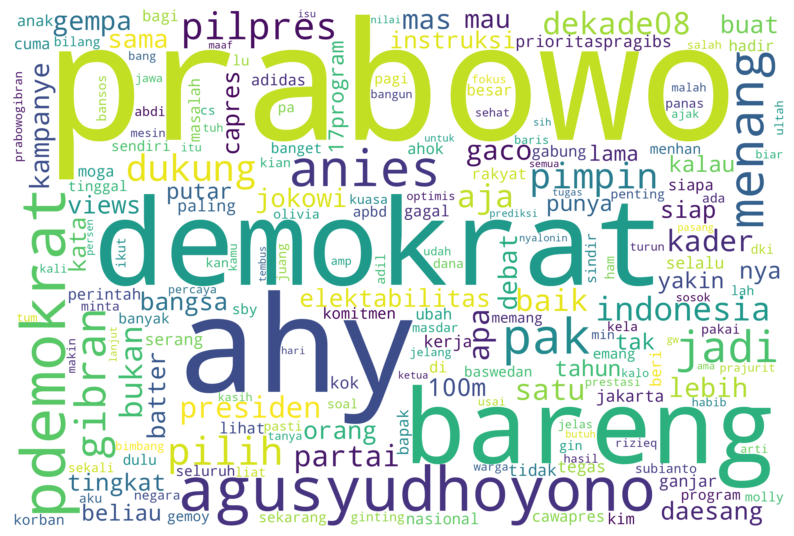

In [27]:
# Import modul WordCloud dan STOPWORDS dari pustaka wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan Word Cloud
def plot_cloud(wordcloud):
    """
    Menampilkan Word Cloud dengan ukuran gambar 10x8 inci.

    Parameters:
    - wordcloud (WordCloud): Objek WordCloud yang akan ditampilkan.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Menggabungkan semua teks dari kolom 'full_text' dalam DataFrame data menjadi satu string
all_words = ' '.join([tweets for tweets in data['full_text']])

# Membuat objek WordCloud dengan konfigurasi tertentu
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='white',  # Mengubah warna latar belakang menjadi putih
    colormap='viridis',  # Mengganti warna dengan 'viridis'
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

# Menampilkan Word Cloud menggunakan fungsi plot_cloud
plot_cloud(wordcloud)


In [28]:
print(data.columns)


Index(['full_text', 'tweet_english', 'klasifikasi'], dtype='object')


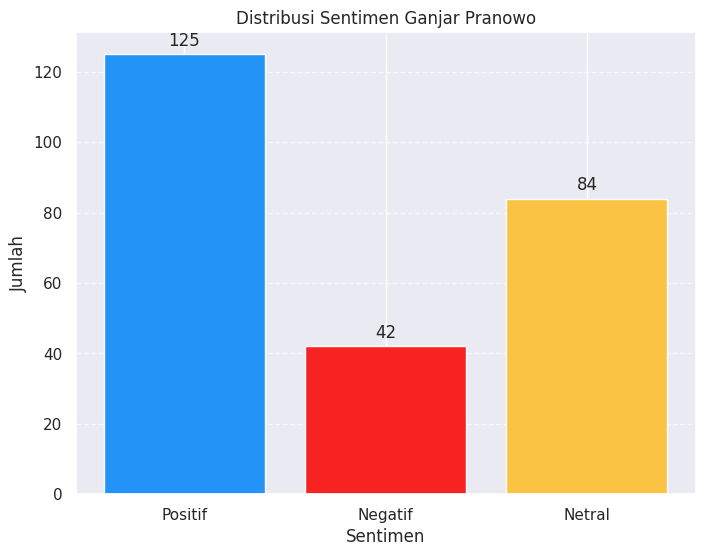

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur tema visualisasi menggunakan Seaborn
sns.set_theme()

# Data untuk membuat diagram batang
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

# Fungsi untuk menampilkan diagram batang
def show_bar_chart(labels, counts, title):
    # Membuat subplot dengan ukuran tertentu
    fig, ax = plt.subplots(figsize=(8, 6))

    # Membuat diagram batang dengan warna tertentu
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan label jumlah di atas setiap batang
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Menambahkan garis-garis grid pada sumbu y
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menetapkan label sumbu x dan y serta judul diagram
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan diagram batang
    plt.show()

# Memanggil fungsi untuk menampilkan diagram batang
show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")


### *Klasifikasi Sentimen Naive Bayes Classifier*

Naive Bayes adalah metode klasifikasi statistik yang mengandalkan Teorema Bayes. Dalam konteks analisis sentimen, Naive Bayes mengasumsikan bahwa setiap kata dalam teks adalah fitur yang independen dan berkontribusi terhadap klasifikasi sentimen secara bersamaan. Meskipun asumsi ini sederhana (naive), Naive Bayes sering memberikan hasil yang baik dalam klasifikasi teks

In [30]:
data

,full_text,tweet_english,klasifikasi
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...,Negatif
1,menhan prabowo subianto abdi korban prajurit t...,minister of defense prabowo subianto servant o...,Negatif
2,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...,Positif
3,ahy demokrat siap kawal menang prabowo gibran ...,ahy democrat ready to control winning prabowo ...,Positif
4,kelola lingkung lanjut komitmen prabowo gibran...,manage the environment further commitment prab...,Positif
...,...,...,...
246,sama pak mas silaturahmi kyai ulama amp santri...,with Mr. Kyai ulama & santri ponpes miftahul h...,Netral
247,hasil survei prabowo gibran moncer ahy yakin m...,the results of the survey prabowo gibran monce...,Positif
248,prabowo orang patriot siap mati negara,prabowo patriots ready to die country,Positif
249,pesan pak prabowo harus terus laku,pak Prabowo's message must continue to sell,Netral


In [31]:
# Menghapus kolom 'full_text' dari DataFrame 'data' dan menyimpan hasilnya di 'dataset'
dataset = data.drop(['full_text'], axis=1, inplace=False)

# Mengubah DataFrame menjadi list of tuples
dataset = [tuple(x) for x in dataset.to_records(index=False)]


In [32]:
import random

set_positif = []
set_negatif = []
set_netral = []

# Membagi dataset menjadi set_positif, set_negatif, dan set_netral berdasarkan sentimen
for n in dataset:
  if (n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append (n)

# Mengambil sampel acak setengah dari setiap kategori sentimen
set_positif = random.sample(set_positif, k=int(len(set_positif) /2))
set_negatif = random.sample(set_negatif, k=int (len (set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len (set_netral)/2))

# Menggabungkan setiap kategori sentimen menjadi satu dataset pelatihan (train)
train = set_positif + set_negatif + set_netral

# Menyimpan dataset pelatihan ke dalam list train_set
train_set = []

# Menggabungkan setengah dari setiap kategori sentimen menjadi satu set data pelatihan (train_set)
for n in train:
  train_set.append(n)

In [33]:
# Membuat dan melatih model klasifikasi Naive Bayes menggunakan TextBlob
from textblob.classifiers import NaiveBayesClassifier

# Membuat dan melatih model klasifikasi Naive Bayes dengan data pelatihan (train_set)
cl = NaiveBayesClassifier(train_set)

# Mengukur akurasi model pada data uji (dataset)
accuracy = cl.accuracy(dataset)

# Menampilkan hasil akurasi model pada data uji
print("Akurasi Test : ", accuracy)


Akurasi Test :  0.7649402390438247


Proses NaiveBayesClassifier dalam coding di atas dilakukan dengan langkah-langkah berikut:

1. Menghapus Kolom 'full_text':
  *   Menggunakan metode drop pada DataFrame data untuk menghapuS kolom 'full_text'.
  *   Hasilnya disimpan pada DataFrame baru yang disebut dataset.
2. Mengubah DataFrame Menjadi List of Tuples
  * Mengubah DataFrame dataset menjadi list of tuples menggunakan list comprehension dan to_records(index=False).
  * Setiap tuple merepresentasikan satu baris data.
3. Membagi Dataset Menjadi Kategori Sentimen:
  * Membuat tiga set terpisah (set_positif, set_negatif, dan set_netral) berdasarkan kategori sentimen ('Positif', 'Negatif', 'Netral').
4. Mengambil Sampel Acak Setengah dari Setiap Kategori Sentimen:
  * Menggunakan fungsi random.sample untuk mengambil sampel acak setengah dari setiap kategori sentimen.
  * Hasilnya disimpan pada variabel set_positif, set_negatif, dan set_netral.
5. Menggabungkan Setiap Kategori Sentimen Menjadi Satu Dataset Pelatihan (Train):
  * Menggabungkan setengah dari setiap kategori sentimen menjadi satu dataset pelatihan (train) menggunakan operasi penggabungan list (+).
6. Menyimpan Dataset Pelatihan ke dalam List train_set:
  * Membuat list baru (train_set) dan menggabungkan setiap tuple dari dataset pelatihan (train) ke dalam list tersebut.
7. Pelatihan Model Naive Bayes Classifier:
  * Membuat objek model klasifikasi Naive Bayes menggunakan textblob.classifiers.NaiveBayesClassifier(train_set).
  * Model ini dilatih dengan menggunakan dataset pelatihan (train_set) yang sudah disiapkan sebelumnya.

In [34]:
# Import library
from textblob import TextBlob

# Mengambil teks tweet dalam bahasa Inggris dari DataFrame
data_tweet = list(data['tweet_english'])

# Inisialisasi variabel polaritas
polaritas = 0

# Inisialisasi variabel status dan total sentimen
status = []
total_positif = total_negatif = total_netral = total = 0

# Inisialisasi variabel untuk confusion matrix
y_true = []
y_pred = []

# Iterasi melalui setiap tweet dalam data
for i, tweet in enumerate(data_tweet):
    # Melakukan analisis sentimen dengan menggunakan classifier yang sudah di-train
    analysis = TextBlob(tweet, classifier=cl)

    # Menentukan sentimen aktual dan sentimen prediksi
    true_sentiment = dataset[i][1]
    predicted_sentiment = analysis.classify()

    # Menyimpan sentimen aktual dan sentimen prediksi untuk confusion matrix
    y_true.append(true_sentiment)
    y_pred.append(predicted_sentiment)

    # Menghitung jumlah sentimen positif, netral, dan negatif
    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Netral':
        total_netral += 1
    else:
        total_negatif += 1

    # Menyimpan sentimen hasil analisis untuk setiap tweet
    status.append(analysis.classify())

    # Menghitung total tweet yang telah di-analisis
    total += 1

# Menampilkan hasil analisis sentimen
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')


Hasil Analisis Data:
Positif = 141
Netral = 97
Negatif = 13

Total Data: 251



Confusion Matrix:
[[110  14   1]
 [ 14  70   0]
 [ 17  13  12]]

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.92      0.29      0.44        42
      Netral       0.72      0.83      0.77        84
     Positif       0.78      0.88      0.83       125

    accuracy                           0.76       251
   macro avg       0.81      0.67      0.68       251
weighted avg       0.78      0.76      0.74       251



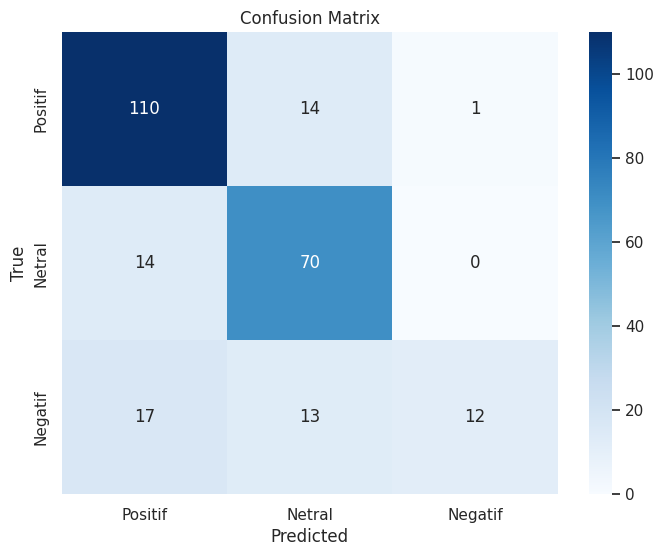

In [35]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=['Positif', 'Netral', 'Negatif'])

# Menghitung classification report
class_report = classification_report(y_true, y_pred)

# Menampilkan confusion matrix dan classification report
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Positif', 'Netral', 'Negatif'],
            yticklabels=['Positif', 'Netral', 'Negatif'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [36]:
# Membuat DataFrame dari hasil klasifikasi Bayes
status_df = pd.DataFrame({"Klasifikasi Bayes": status})

# Menambahkan kolom 'klasifikasi_bayes' ke dalam DataFrame data
data['klasifikasi_bayes'] = status_df


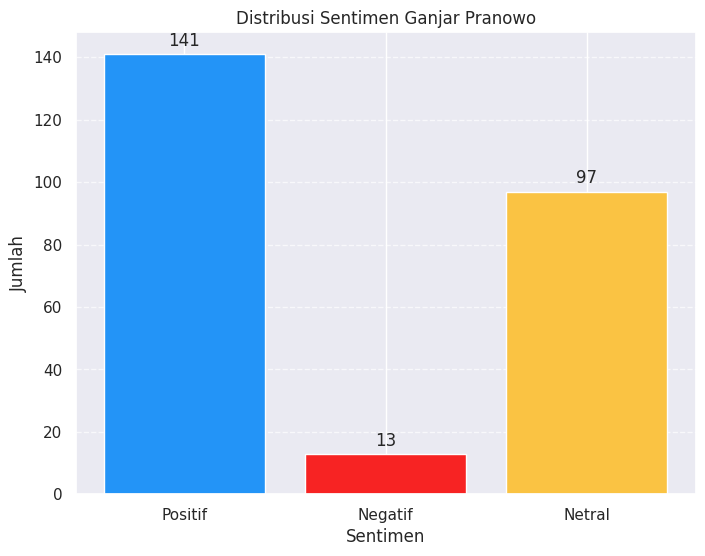

In [37]:
import seaborn as sns

# Setting tema seaborn
sns.set_theme()

# Data untuk plot
labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

# Fungsi untuk menampilkan diagram batang
def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    # Menambahkan label angka di atas batang
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Menambahkan label sumbu x, sumbu y, dan judul
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    # Menampilkan plot
    plt.show()

# Menjalankan fungsi untuk menampilkan diagram batang
show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")


In [38]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,eh botak bilang capres lu dulu ngobrol ama ani...,uh bald said your presidential candidate used ...,Negatif,Netral
1,menhan prabowo subianto abdi korban prajurit t...,minister of defense prabowo subianto servant o...,Negatif,Netral
2,elektabilitas tembus 45 persen ahy prabowo men...,electability penetrates 45 percent ahy prabowo...,Positif,Positif
3,ahy demokrat siap kawal menang prabowo gibran ...,ahy democrat ready to control winning prabowo ...,Positif,Positif
4,kelola lingkung lanjut komitmen prabowo gibran...,manage the environment further commitment prab...,Positif,Positif
...,...,...,...,...
246,sama pak mas silaturahmi kyai ulama amp santri...,with Mr. Kyai ulama & santri ponpes miftahul h...,Netral,Positif
247,hasil survei prabowo gibran moncer ahy yakin m...,the results of the survey prabowo gibran monce...,Positif,Positif
248,prabowo orang patriot siap mati negara,prabowo patriots ready to die country,Positif,Positif
249,pesan pak prabowo harus terus laku,pak Prabowo's message must continue to sell,Netral,Netral


In [39]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

# Iterasi melalui setiap elemen tuple dalam data_eval
for n in data_eval:
    # Memeriksa apakah tuple memiliki setidaknya 4 elemen
    if len(n) >= 4:
        # Memeriksa apakah elemen ke-2 dan ke-3 dari tuple tidak sama
        if n[2] != n[3]:
            # Menampilkan informasi teks, klasifikasi, dan klasifikasi Bayes yang berbeda
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
    else:
        print("Tuple tidak memiliki cukup elemen.")

Text: eh botak bilang capres lu dulu ngobrol ama anies bahas komitmen untuk nuntasin dibjakarta lama ngejabat gamau nyalonin bentuk apa pilpres 2019 karenaaa udh komitmen ama pak prabowo mau fokus jakartaaa dulu jadi gubernur gemes gw
Classifier: Negatif
Classifier Bayes: Netral

Text: menhan prabowo subianto abdi korban prajurit tak henti tetap lama dekade08
Classifier: Negatif
Classifier Bayes: Netral

Text: jokowi hebatsetuju lihat tampil prabowo debat 1 beliau salah pilih orang
Classifier: Negatif
Classifier Bayes: Positif

Text: percaya pak lagi percaya prabowo
Classifier: Netral
Classifier Bayes: Positif

Text: ketua tim komunikasi tkn prabowo gibran budisatrio djiwandono prabowo tetap serius tugas menhan jelang debat pertama capres dekade08
Classifier: Negatif
Classifier Bayes: Positif

Text: ahy optimis prabowo wujud ubah indonesia ft agusyudhoyono pdemokrat demokrat bareng ahy
Classifier: Netral
Classifier Bayes: Positif

Text: prabowo subianto dapat banyak dukung artis maupun